In [1]:
import dataframetransform as cleandata

In [2]:
import dataframeinfo as info
import plotter as plots

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
loans = cleandata.loans

In [5]:
loans.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.000000,8000.0,36.0,7.49,248.82,A,A4,...,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.000000,13200.0,36.0,6.99,407.52,A,A3,...,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.000000,16000.0,36.0,7.49,497.63,A,A4,...,0.0,0.0,0.0,2021-10-01,12850.16,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.000000,15000.0,36.0,14.31,514.93,C,C4,...,0.0,0.0,0.0,2021-06-01,13899.67,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.000000,15000.0,36.0,6.03,456.54,A,A1,...,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,2525,2525.000000,2525.0,36.0,11.44,83.20,B,B4,...,0.0,0.0,0.0,2022-01-01,91.39,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,6675,6675.000000,6675.0,36.0,21.99,254.89,E,E5,...,0.0,0.0,0.0,2021-03-01,6724.95,2022-02-01,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,26500,26500.000000,26200.0,36.0,19.99,701.95,E,E3,...,0.0,0.0,0.0,2021-08-01,701.95,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.000000,10000.0,60.0,12.99,227.48,C,C2,...,0.0,0.0,0.0,2022-01-01,227.48,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,10000,9939.462638,10000.0,36.0,8.19,314.25,A,A5,...,0.0,0.0,0.0,2022-01-01,314.25,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL


In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54173 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          54173 non-null  int64        
 1   member_id                   54173 non-null  int64        
 2   loan_amount                 54173 non-null  int64        
 3   funded_amount               54173 non-null  float64      
 4   funded_amount_inv           54173 non-null  float64      
 5   term_months                 54173 non-null  float64      
 6   int_rate                    54173 non-null  float64      
 7   instalment                  54173 non-null  float64      
 8   grade                       54173 non-null  category     
 9   sub_grade                   54173 non-null  category     
 10  employment_min_years        54173 non-null  float64      
 11  home_ownership              54173 non-null  category     
 12  annual_in

In [7]:
exclude_columns = ["id", "member_id", "policy_code", "application_type"]

In [8]:
# Calculate skew in relevant numeric columns. 
relevant_skew = loans.drop(columns=exclude_columns).skew(numeric_only=True)

# Show minimally skewed columns and skew. 
for index, value in relevant_skew.items():
    if -0.5 < value < 0.5:
        print(f"{index}     {value}")

int_rate     0.45592527463680566
employment_min_years     -0.18400513755598247
dti     0.18934017024844713


In [9]:
# Show skewed columns and skew. 
for index, value in relevant_skew.items():
    if value > 0.5 or value < -0.5:
        print(f"{index}     {value}")

loan_amount     0.8045987276901947
funded_amount     0.819908162432026
funded_amount_inv     0.8147356320847864
term_months     1.1436598024514208
instalment     0.9964837640965932
annual_inc     8.732749984602108
delinq_2yrs     5.312419757368575
inq_last_6mths     3.239352260929659
open_accounts     1.0595437819202826
total_accounts     0.7800600928479244
out_prncp     2.354708304153977
out_prncp_inv     2.3551289829758923
total_payment     1.2672635816292295
total_payment_inv     1.2567722958300698
total_rec_prncp     1.2603165044709899
total_rec_int     2.20335575425346
total_rec_late_fee     13.267433192081826
recoveries     14.595305371100382
collection_recovery_fee     27.649317777134538
last_payment_amount     2.4981184800334835
collections_12_mths_ex_med     20.251462828439973


In [10]:
# Create instance of the DataFrameInfo class
loans_info = info.DataFrameInfo(loans)

In [11]:
# Create instance of Plotter class
loans_plots = plots.Plotter(loans)

In [12]:
# Create class that inherits from Plotter

class SkewCheck(plots.Plotter):
   def __init__ (self, data):
     super().__init__(data)
     self.skew_dict = {} 

   def skew_check(self, column, bins=20, kde=True, rot=45, num_labels=20):
      k2 = self.k2_test(column)
      self.skew_dict[column] = k2
      self.histogram(column, bins, kde).format_hist(rot, num_labels)
      self.qq_plot(column)

   def show_dict(self):
      print(self.skew_dict)
      return(self.skew_dict)

In [13]:
# Create instance of the SkewCheck class
skew_info = SkewCheck(loans)

loan_amount: K^2 test statistic = 4574.836, p = 0.000


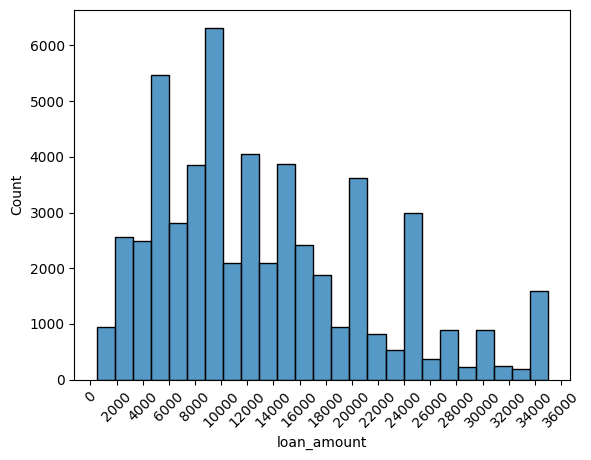

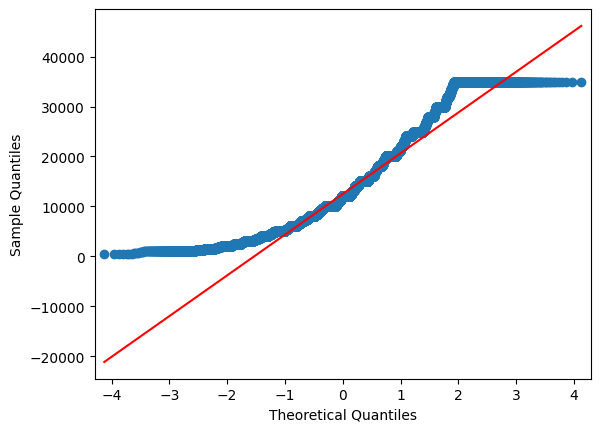

funded_amount: K^2 test statistic = 4731.279, p = 0.000


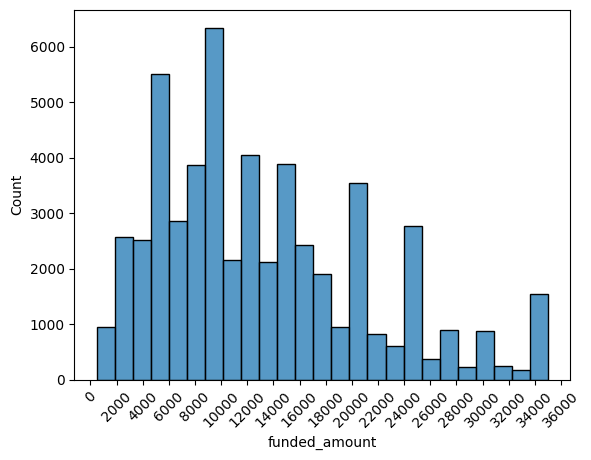

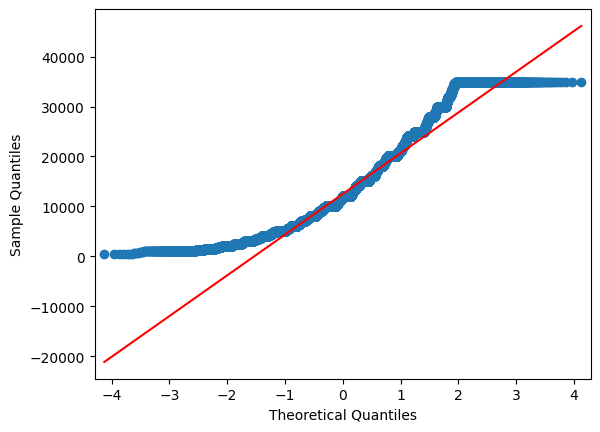

funded_amount_inv: K^2 test statistic = 4688.198, p = 0.000


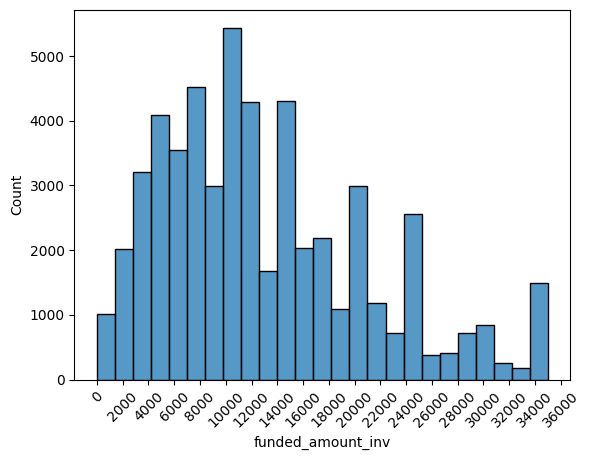

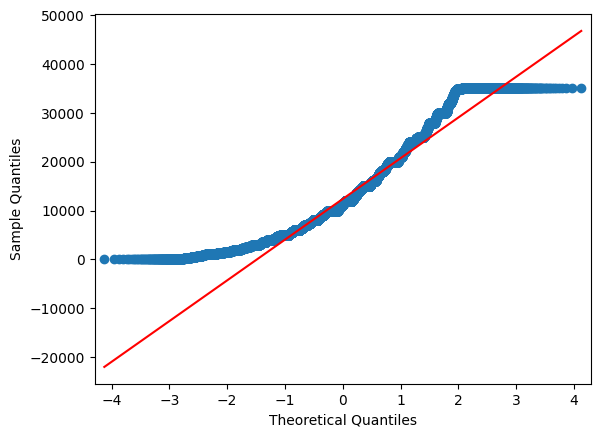

term_months: K^2 test statistic = 10559.478, p = 0.000


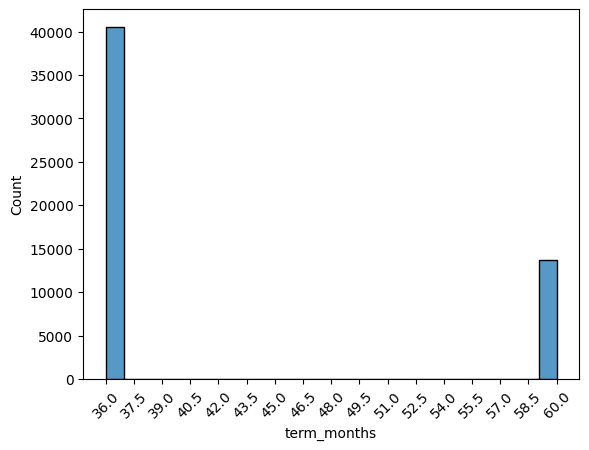

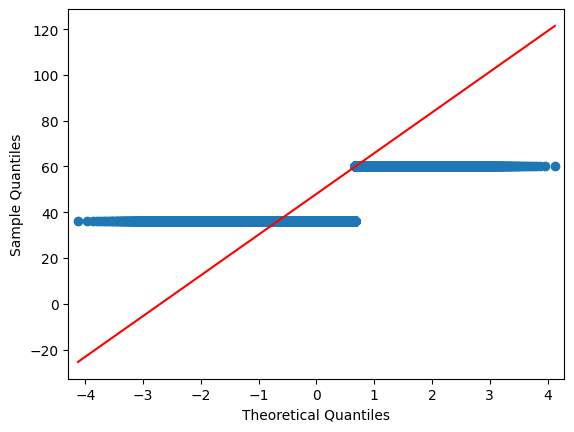

int_rate: K^2 test statistic = 1720.483, p = 0.000


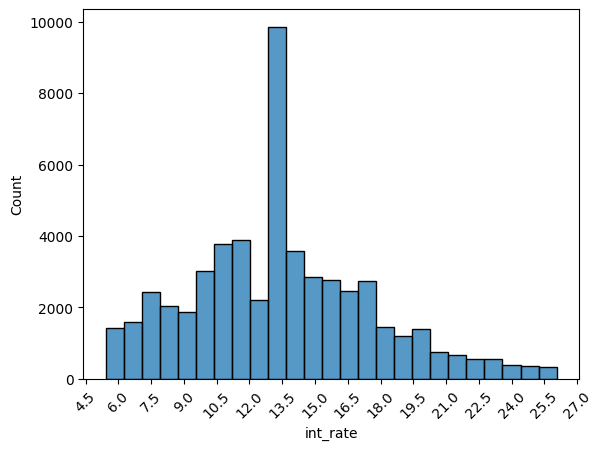

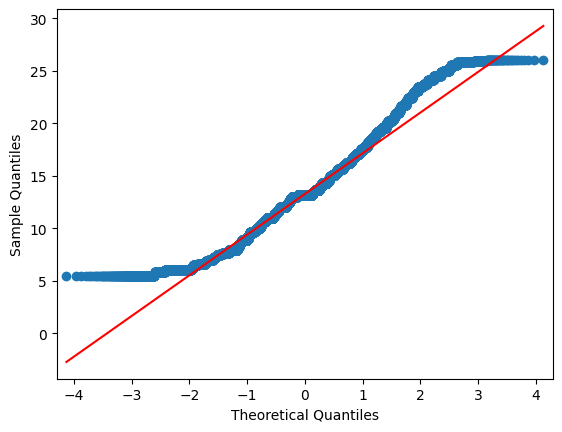

instalment: K^2 test statistic = 7274.975, p = 0.000


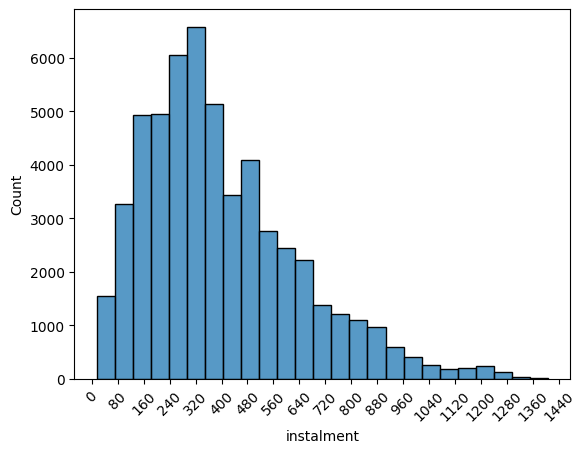

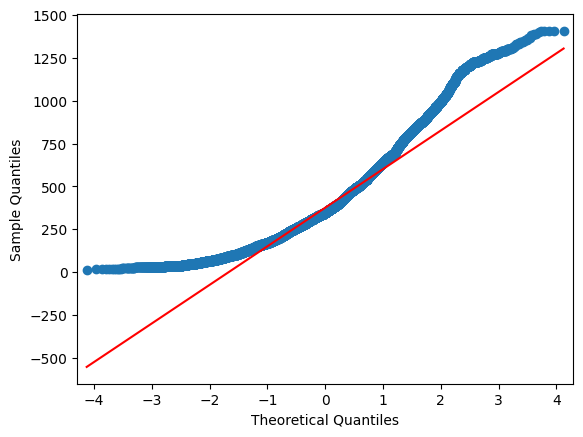

employment_min_years: K^2 test statistic = 347060.910, p = 0.000


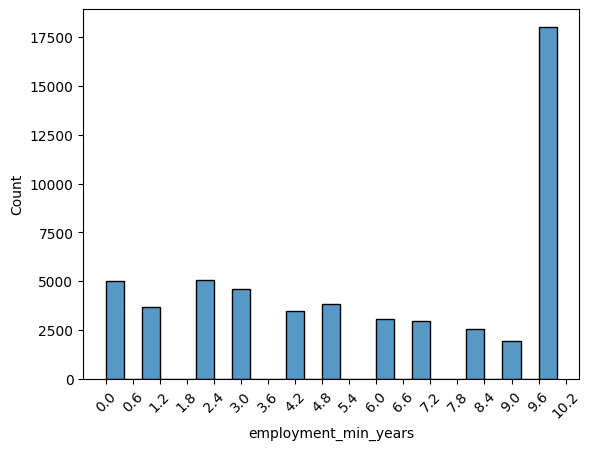

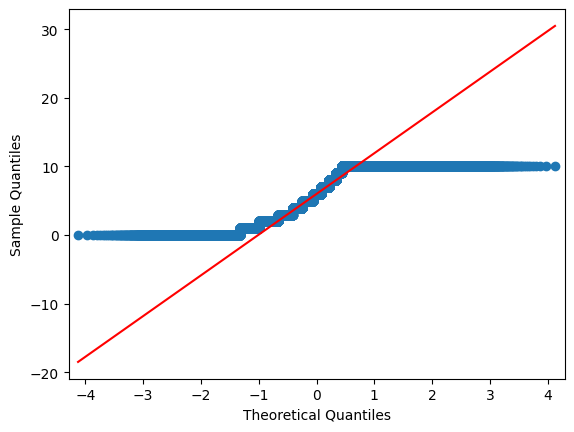

annual_inc: K^2 test statistic = 80484.555, p = 0.000


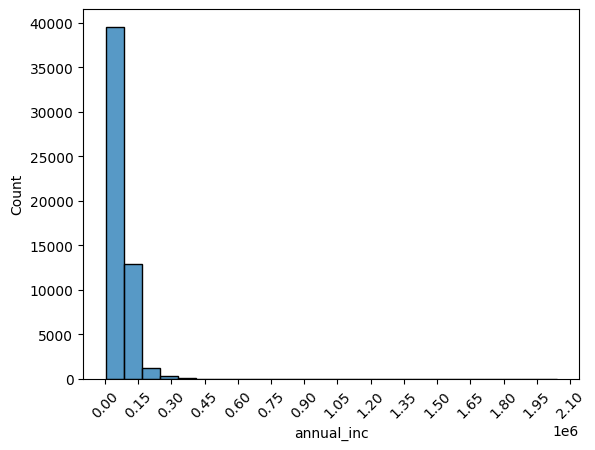

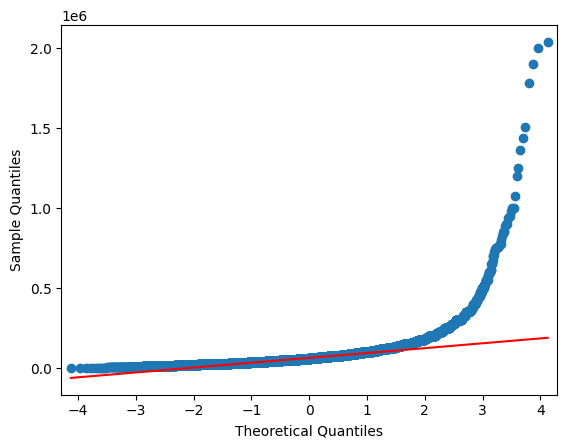

dti: K^2 test statistic = 1236.329, p = 0.000


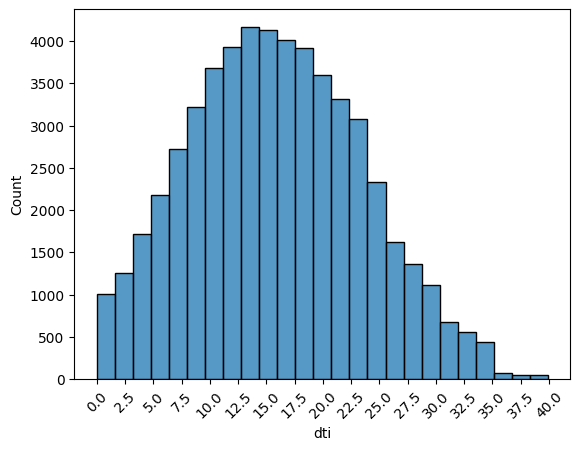

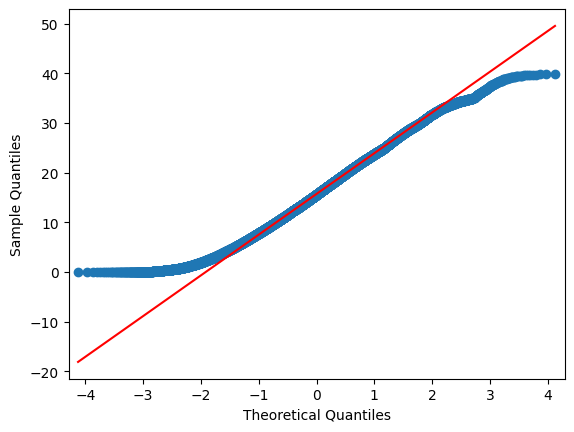

delinq_2yrs: K^2 test statistic = 57879.466, p = 0.000


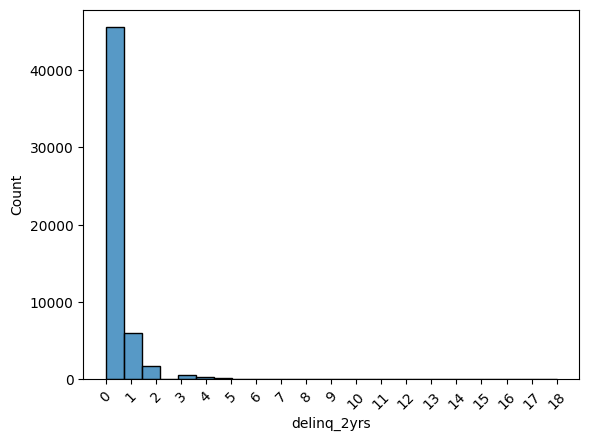

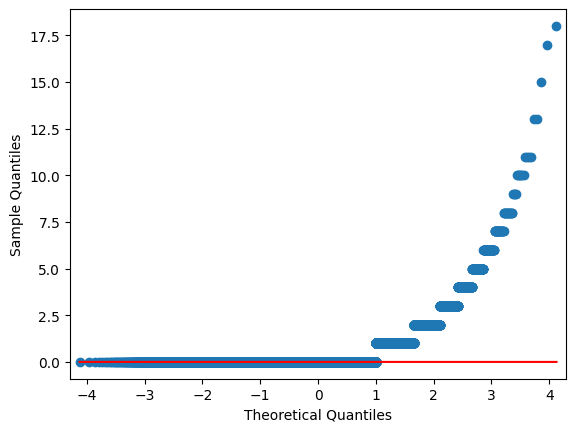

inq_last_6mths: K^2 test statistic = 42202.059, p = 0.000


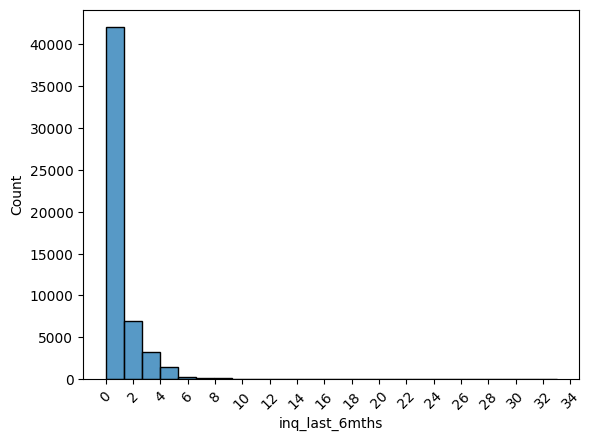

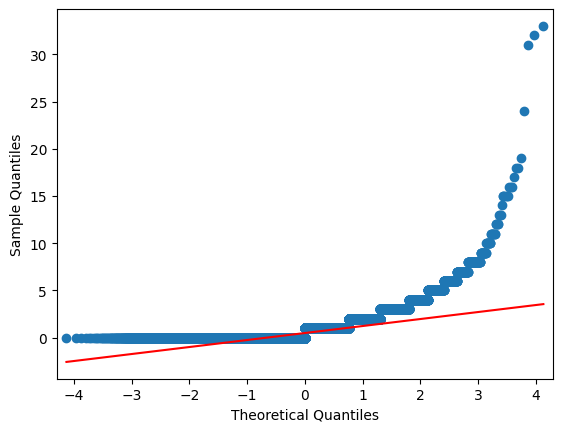

open_accounts: K^2 test statistic = 9782.864, p = 0.000


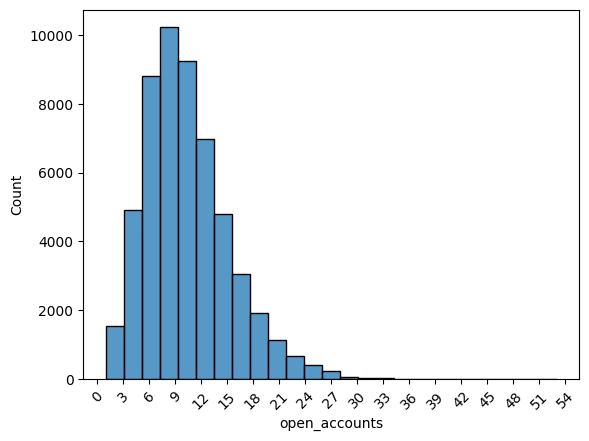

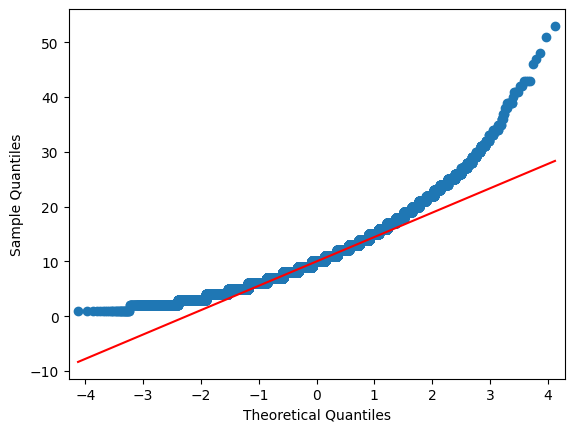

total_accounts: K^2 test statistic = 4968.274, p = 0.000


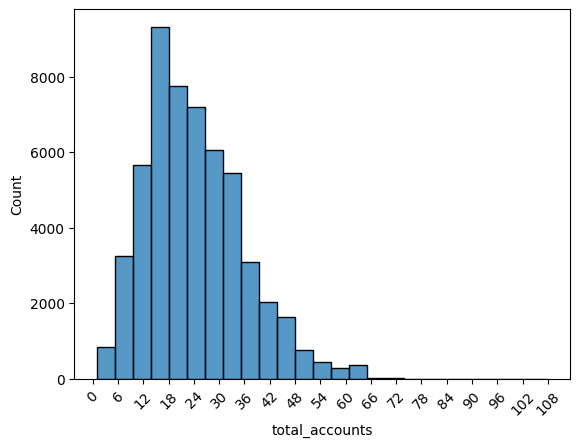

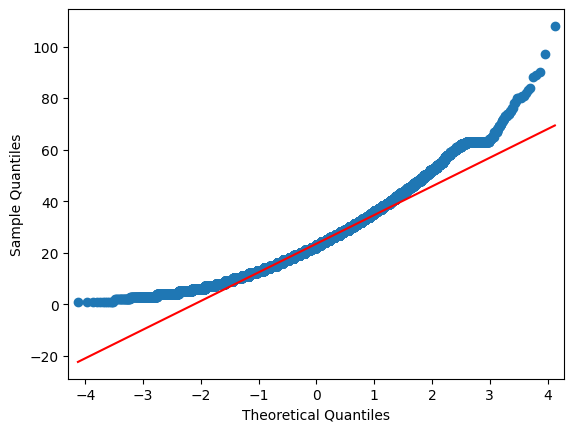

out_prncp: K^2 test statistic = 25581.289, p = 0.000


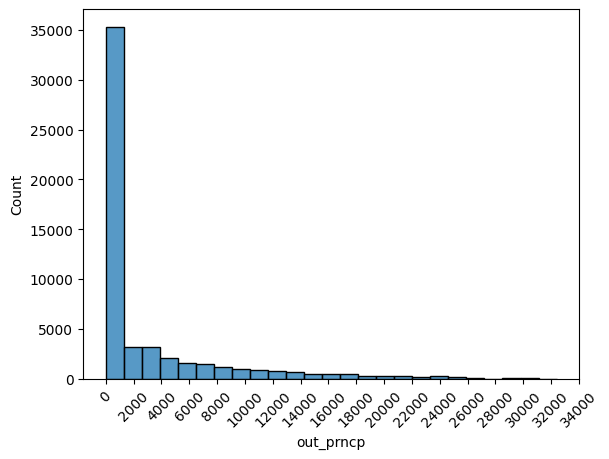

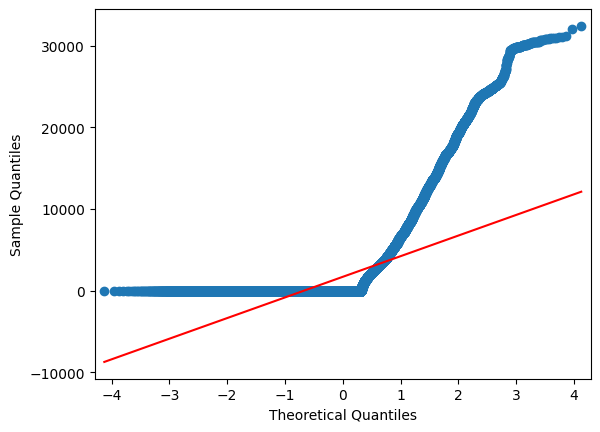

out_prncp_inv: K^2 test statistic = 25586.577, p = 0.000


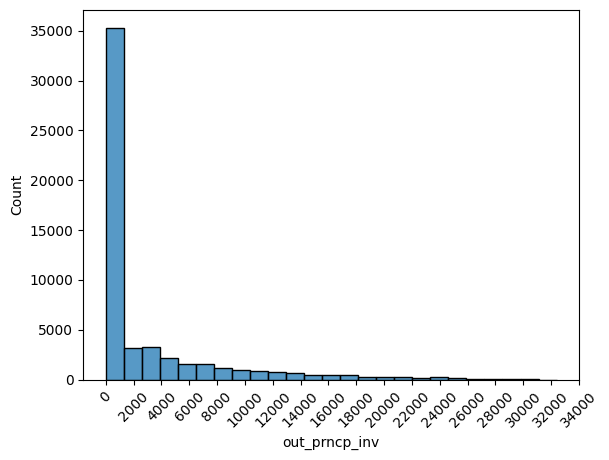

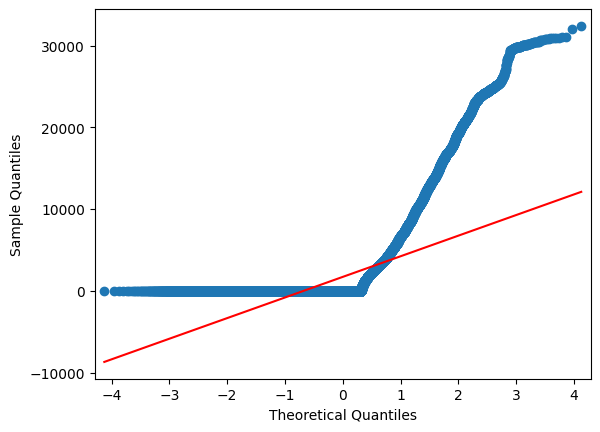

total_payment: K^2 test statistic = 11242.506, p = 0.000


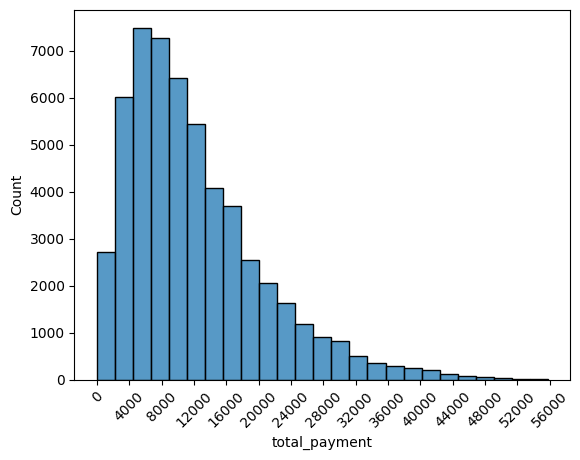

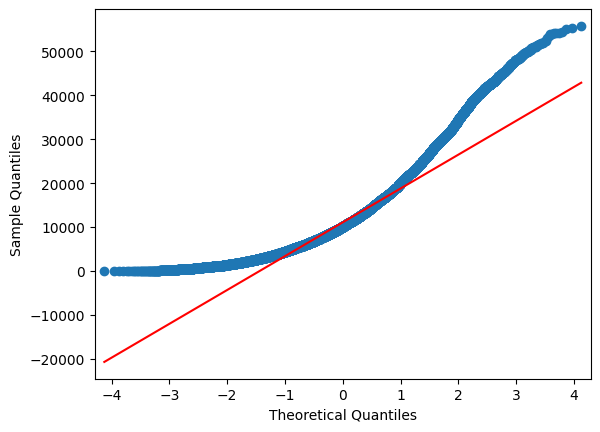

total_payment_inv: K^2 test statistic = 11089.046, p = 0.000


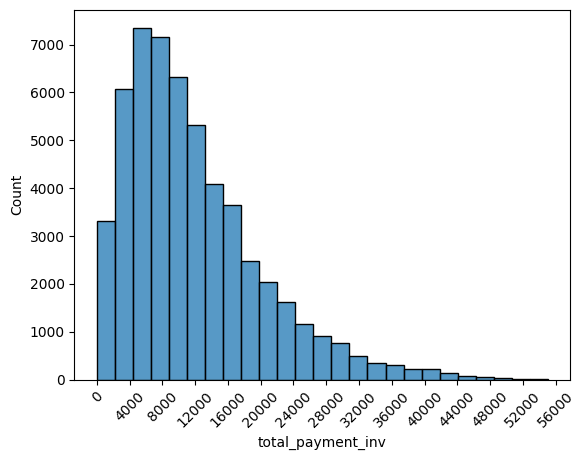

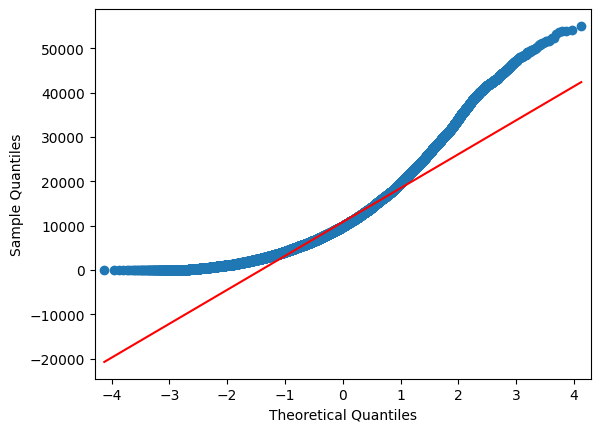

total_rec_prncp: K^2 test statistic = 10759.903, p = 0.000


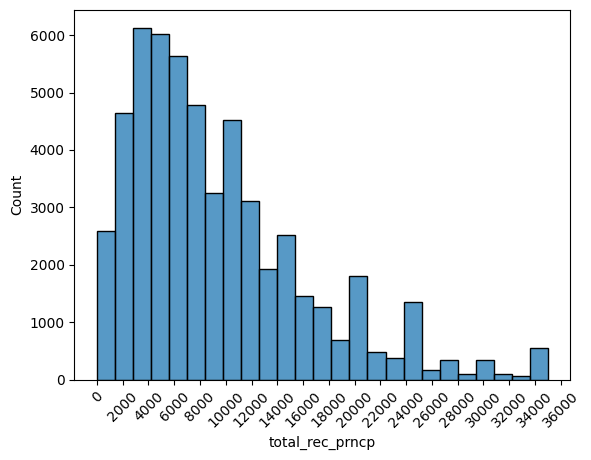

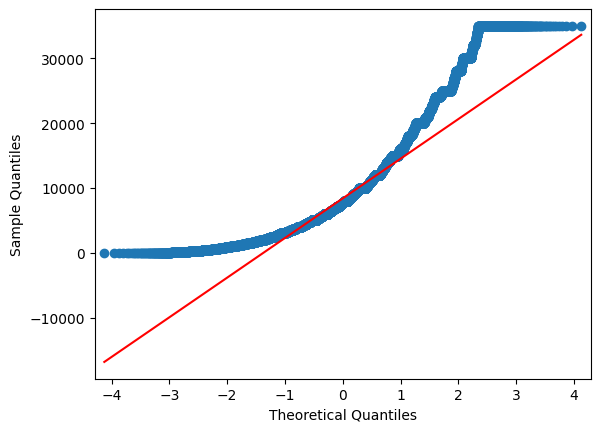

total_rec_int: K^2 test statistic = 24838.258, p = 0.000


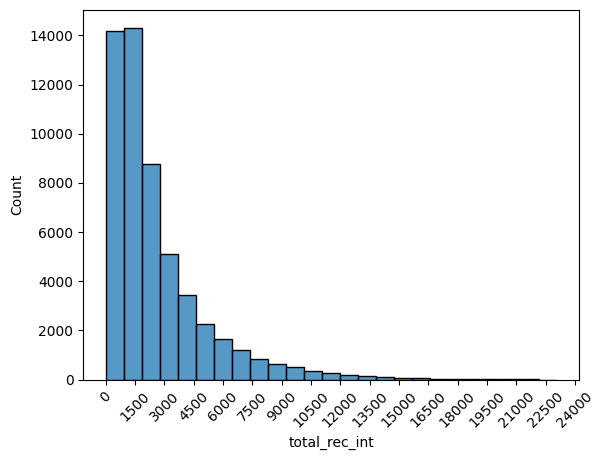

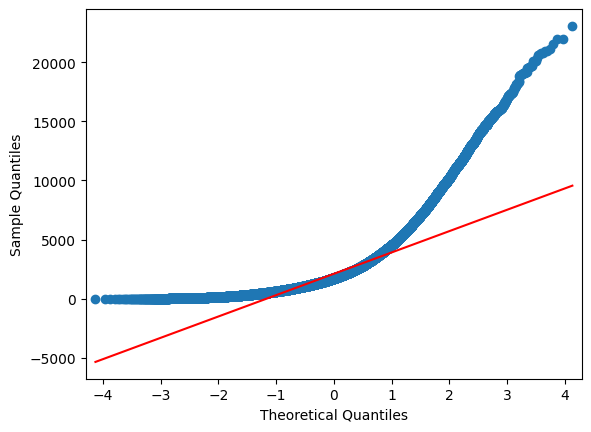

total_rec_late_fee: K^2 test statistic = 98849.802, p = 0.000


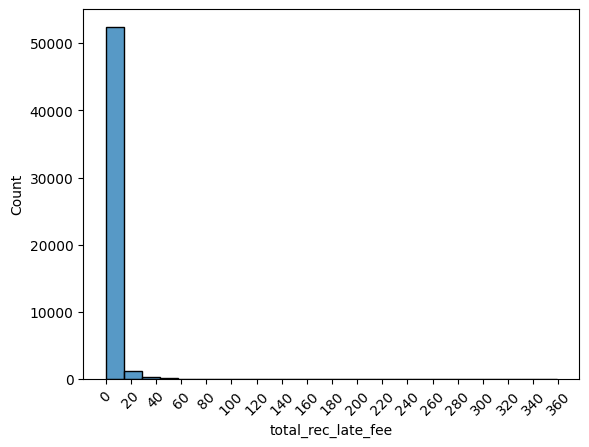

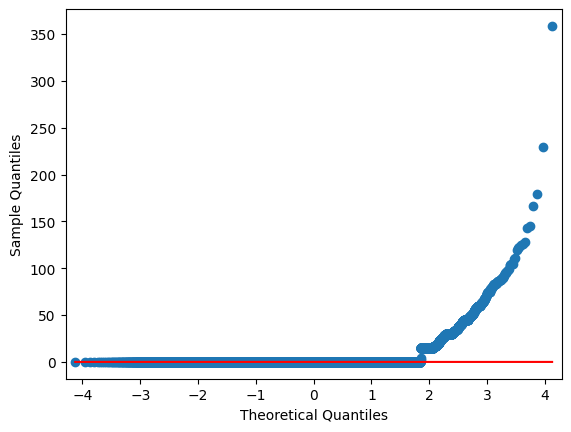

recoveries: K^2 test statistic = 102757.220, p = 0.000


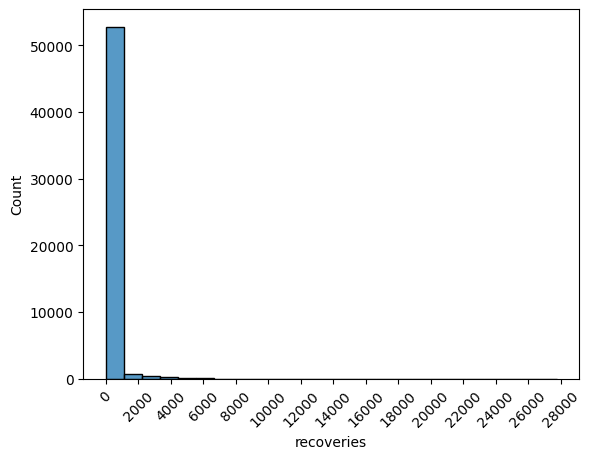

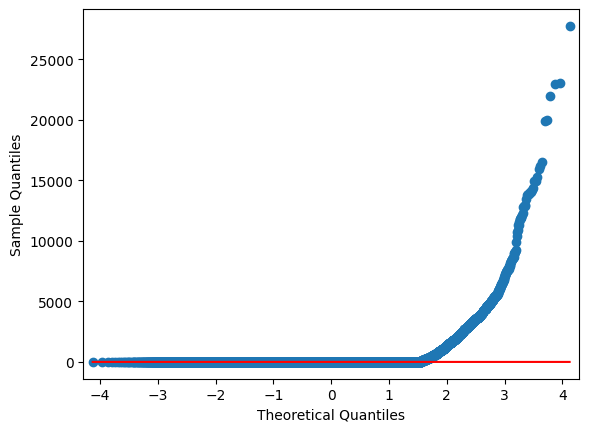

collection_recovery_fee: K^2 test statistic = 135938.714, p = 0.000


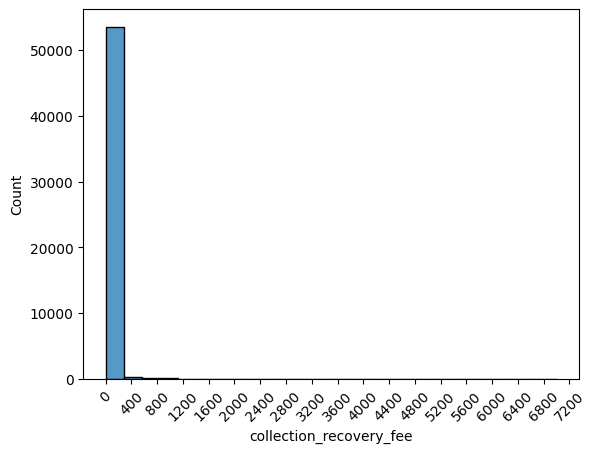

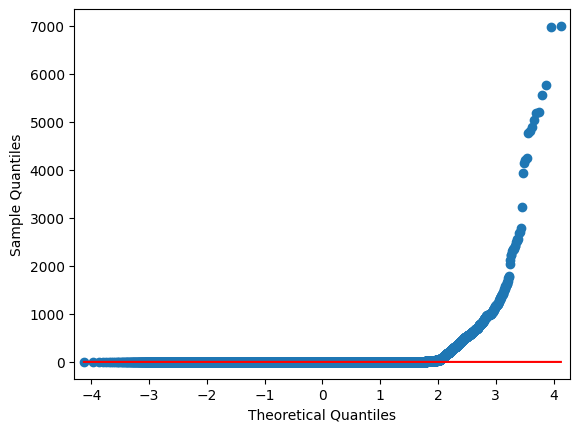

last_payment_amount: K^2 test statistic = 27742.046, p = 0.000


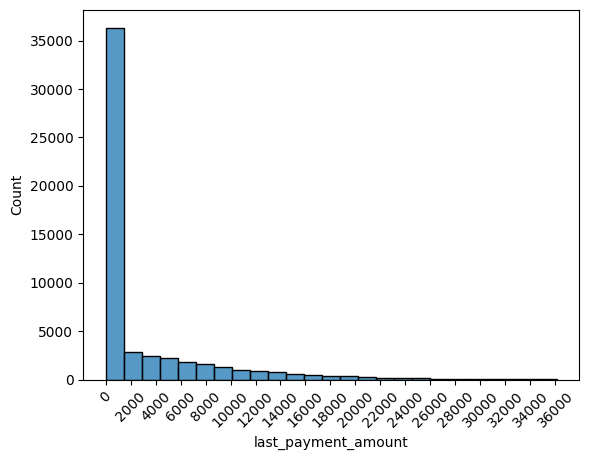

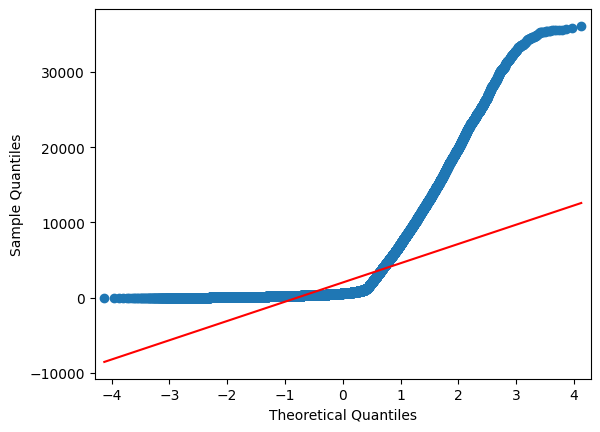

collections_12_mths_ex_med: K^2 test statistic = 118875.877, p = 0.000


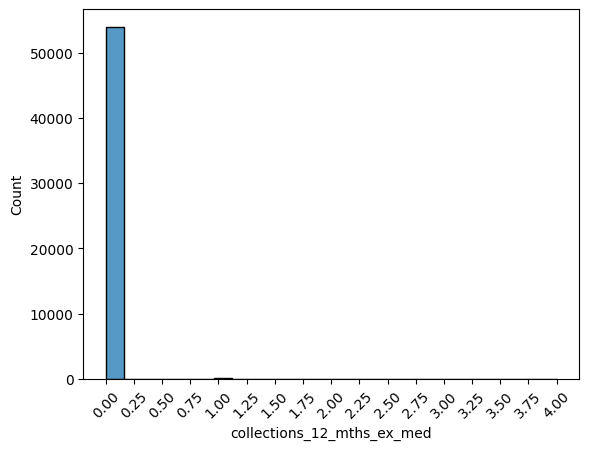

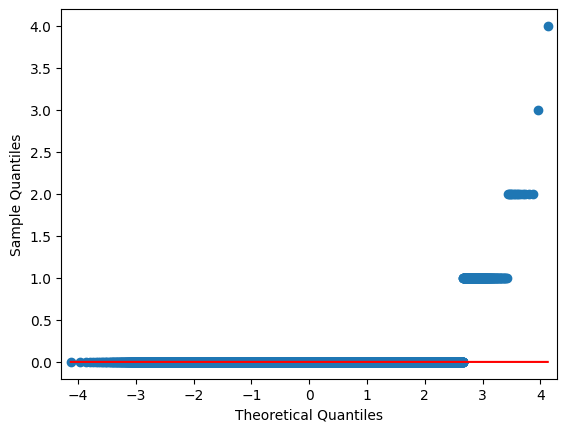

In [14]:
for index, value in relevant_skew.items():
    skew_info.skew_check(index, bins=25, kde=False)

In [15]:
k2_dict = skew_info.show_dict()

{'loan_amount': 4574.84, 'funded_amount': 4731.28, 'funded_amount_inv': 4688.2, 'term_months': 10559.48, 'int_rate': 1720.48, 'instalment': 7274.98, 'employment_min_years': 347060.91, 'annual_inc': 80484.55, 'dti': 1236.33, 'delinq_2yrs': 57879.47, 'inq_last_6mths': 42202.06, 'open_accounts': 9782.86, 'total_accounts': 4968.27, 'out_prncp': 25581.29, 'out_prncp_inv': 25586.58, 'total_payment': 11242.51, 'total_payment_inv': 11089.05, 'total_rec_prncp': 10759.9, 'total_rec_int': 24838.26, 'total_rec_late_fee': 98849.8, 'recoveries': 102757.22, 'collection_recovery_fee': 135938.71, 'last_payment_amount': 27742.05, 'collections_12_mths_ex_med': 118875.88}


In [16]:
# Create empty dataframe.
skew_df = pd.DataFrame()

In [17]:
skew_dict = relevant_skew.to_dict()
col_names = list(skew_dict.keys())
print(col_names)

['loan_amount', 'funded_amount', 'funded_amount_inv', 'term_months', 'int_rate', 'instalment', 'employment_min_years', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


In [18]:
skew_df.insert(loc=0, column='variable', value=col_names)

In [19]:
skew_values = list(skew_dict.values())
skew_df.insert(loc=1, column='skew', value=skew_values)

In [20]:
k2_values = list(k2_dict.values())
skew_df.insert(loc=2, column='k2_stat', value=k2_values)

In [21]:
skew_df

,variable,skew,k2_stat
0,loan_amount,0.804599,4574.84
1,funded_amount,0.819908,4731.28
2,funded_amount_inv,0.814736,4688.20
3,term_months,1.143660,10559.48
4,int_rate,0.455925,1720.48
5,instalment,0.996484,7274.98
6,employment_min_years,-0.184005,347060.91
7,annual_inc,8.732750,80484.55
8,dti,0.189340,1236.33
9,delinq_2yrs,5.312420,57879.47


In [22]:
skew_df = skew_df.set_index("variable")

In [23]:
skew_df.head(5)

,skew,k2_stat
variable,,
loan_amount,0.804599,4574.84
funded_amount,0.819908,4731.28
funded_amount_inv,0.814736,4688.20
term_months,1.143660,10559.48
int_rate,0.455925,1720.48


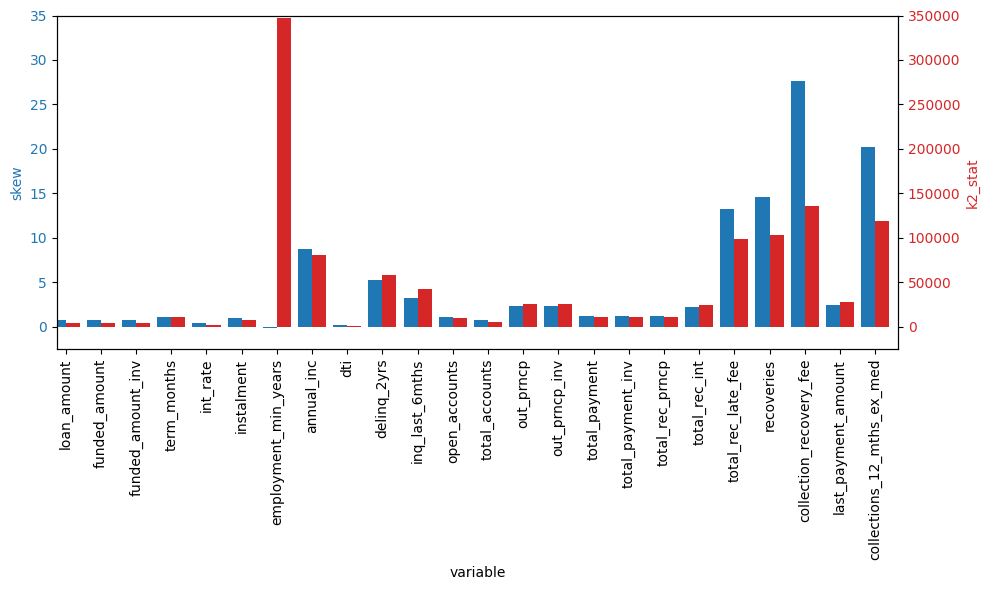

In [24]:
# Create a figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
skew_df['skew'].plot(kind='bar', ax=ax1, width=0.4, position=1, color=color1)
ax1.set_ylabel('skew', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(bottom=-2.5)
ax1.set_ylim(top=35)

ax2 = ax1.twinx()
color2 = 'tab:red'
skew_df['k2_stat'].plot(kind='bar', ax=ax2, width=0.4, position=0, color=color2)
ax2.set_ylabel('k2_stat', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(bottom=-25000)
ax2.set_ylim(top=350000)

fig.tight_layout()


# Test transformations

## 1. Log data

### Columns without "zero" values

In [25]:
loans_copy_a = loans

In [26]:
# Create list of columns that contain zero values.
zero_cols = loans_copy_a.columns[(loans_copy_a == 0).any()]
zero_cols = list(zero_cols)
print(zero_cols)
print(len(zero_cols))

['funded_amount_inv', 'employment_min_years', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
16


In [27]:
# Create list of columns that are in the skew_dict and do not contain zero vaues.
cols_to_transform = [col for col in skew_dict if col not in zero_cols]

print(cols_to_transform)
print(len(cols_to_transform))

['loan_amount', 'funded_amount', 'term_months', 'int_rate', 'instalment', 'annual_inc', 'open_accounts', 'total_accounts']
8


In [28]:
# Term months and int_rate will be dropped from the list
cols_to_transform.remove("term_months")
cols_to_transform.remove("int_rate")
print(cols_to_transform)

['loan_amount', 'funded_amount', 'instalment', 'annual_inc', 'open_accounts', 'total_accounts']


In [29]:
log_columns = loans_copy_a[cols_to_transform].apply(np.log)

In [30]:
print(log_columns.shape)
log_columns.head(5)

(54173, 6)


,loan_amount,funded_amount,instalment,annual_inc,open_accounts,total_accounts
0,8.987197,8.987197,5.516730,10.736397,2.484907,3.295837
1,9.487972,9.487972,6.010090,10.819778,2.708050,3.433987
2,9.680344,9.680344,6.209857,11.210644,1.945910,2.890372
3,9.615805,9.615805,6.244031,10.645425,1.791759,2.564949
4,9.615805,9.615805,6.123676,11.884489,3.135494,3.912023


In [31]:
skew_info_log_cols = SkewCheck(log_columns)

#### Run skew_check on transformed columns

loan_amount: K^2 test statistic = 3663.570, p = 0.000


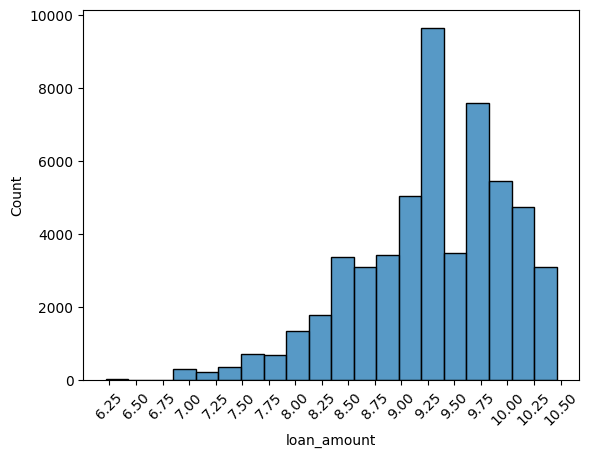

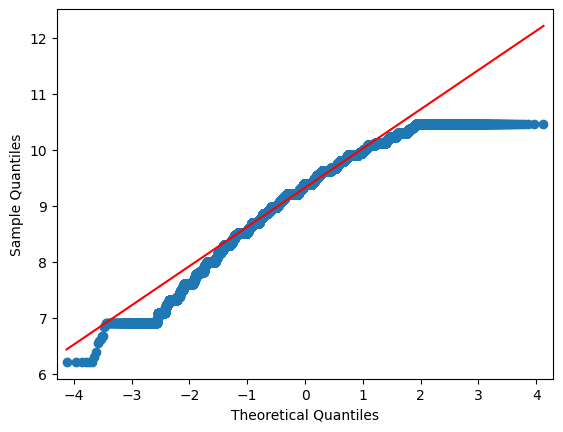

funded_amount: K^2 test statistic = 3642.347, p = 0.000


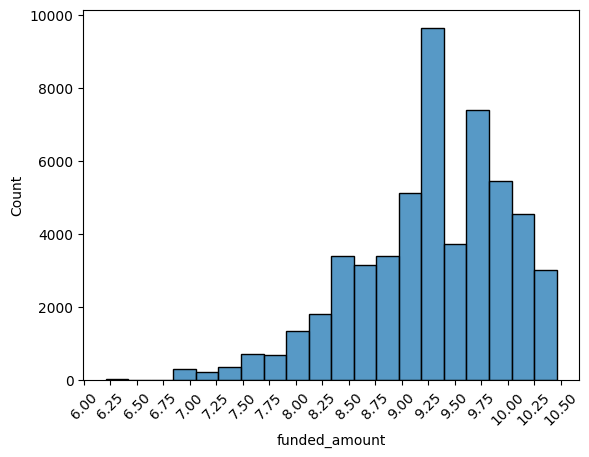

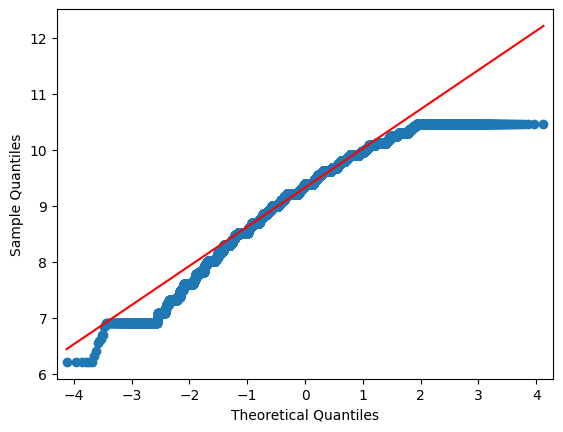

instalment: K^2 test statistic = 3780.208, p = 0.000


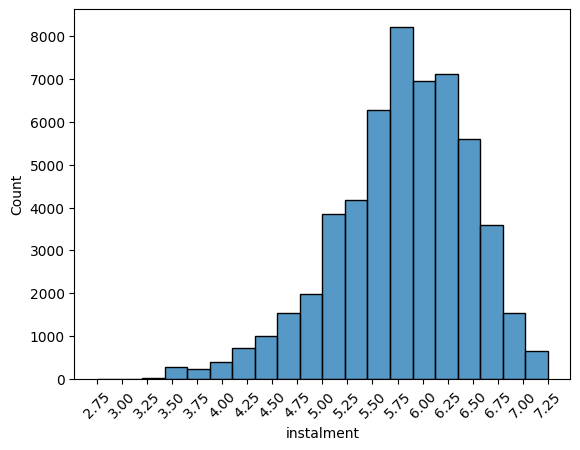

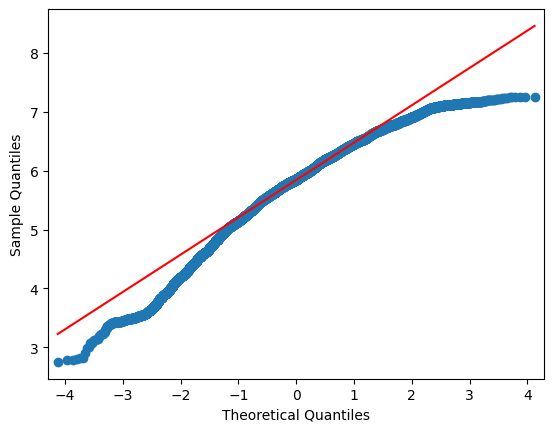

annual_inc: K^2 test statistic = 1521.121, p = 0.000


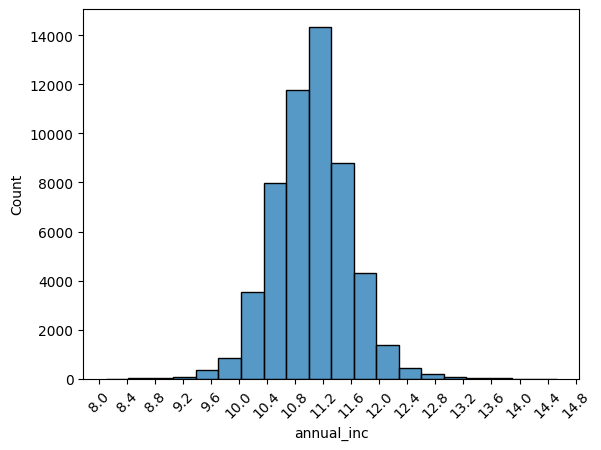

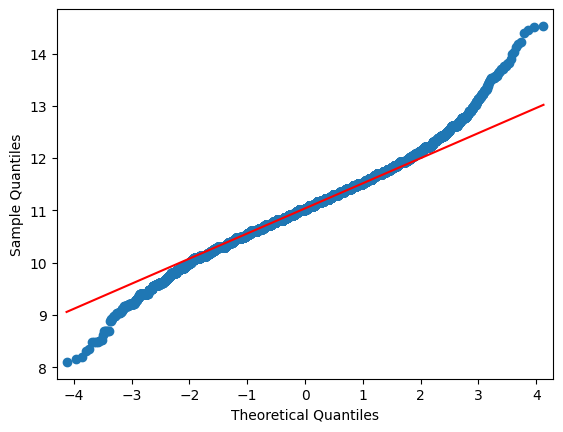

open_accounts: K^2 test statistic = 2287.425, p = 0.000


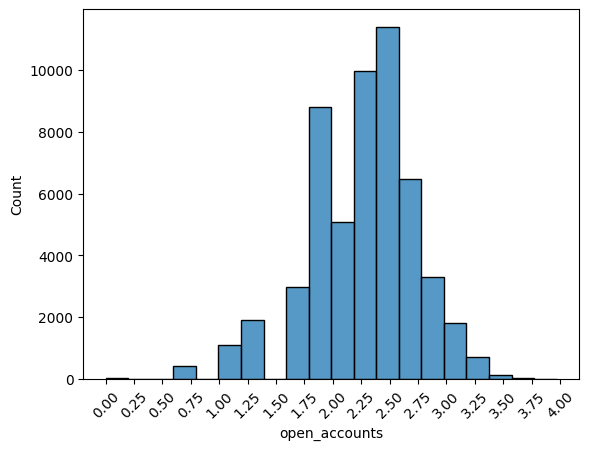

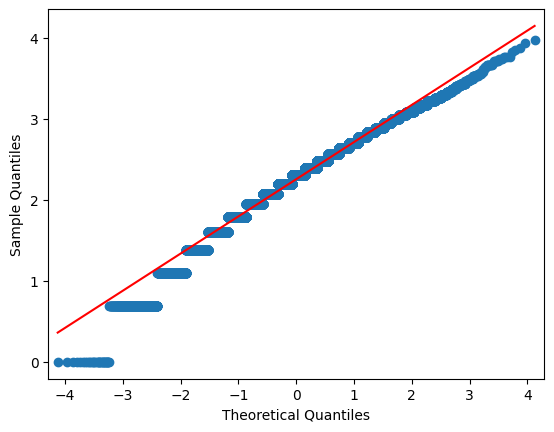

total_accounts: K^2 test statistic = 4088.676, p = 0.000


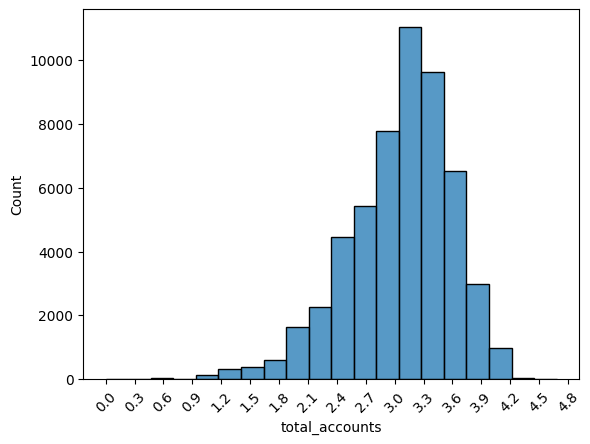

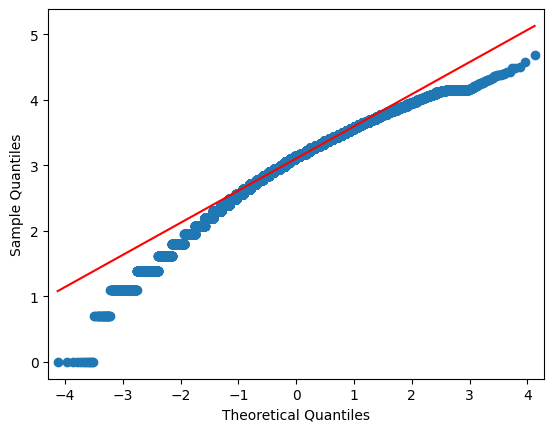

In [32]:
for col in cols_to_transform:
    skew_info_log_cols.skew_check(col, kde=False)

In [33]:
k2_dict_log_trans = skew_info_log_cols.show_dict()

{'loan_amount': 3663.57, 'funded_amount': 3642.35, 'instalment': 3780.21, 'annual_inc': 1521.12, 'open_accounts': 2287.43, 'total_accounts': 4088.68}


#### Update skew_df to compare k2 values

In [34]:
skew_df["log_data_k2_stat"] = None

In [35]:
skew_df["log_data_k2_stat"] = k2_dict_log_trans

In [36]:
skew_df

,skew,k2_stat,log_data_k2_stat
variable,,,
loan_amount,0.804599,4574.84,3663.57
funded_amount,0.819908,4731.28,3642.35
funded_amount_inv,0.814736,4688.20,NaN
term_months,1.143660,10559.48,NaN
int_rate,0.455925,1720.48,NaN
instalment,0.996484,7274.98,3780.21
employment_min_years,-0.184005,347060.91,NaN
annual_inc,8.732750,80484.55,1521.12
dti,0.189340,1236.33,NaN


### Columns with "zero" values

In [37]:
# List columns to add and constant to before transforming.
cols_to_transform_zeros = [col for col in skew_dict if col in zero_cols]

print(cols_to_transform_zeros)
print(len(cols_to_transform_zeros))

['funded_amount_inv', 'employment_min_years', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
16


In [38]:
# Remove dti; distribution is not skewed. 
cols_to_transform_zeros.remove("dti")
print(cols_to_transform_zeros)

['funded_amount_inv', 'employment_min_years', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


In [39]:
log_columns_2 = loans_copy_a[cols_to_transform_zeros].map(lambda x: np.log(x) if x > 0 else 0)

In [51]:
# Check resulting dataframe.
log_columns_2.head(3)

,funded_amount_inv,employment_min_years,delinq_2yrs,inq_last_6mths,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med
0,8.987197,1.609438,0.693147,0.0,8.617889,8.617889,8.000521,8.000521,7.812095,6.238735,0.0,0.0,0.0,5.516730,0.0
1,9.487972,2.197225,0.000000,0.0,9.116341,9.116341,8.493947,8.493947,8.318052,6.669422,0.0,0.0,0.0,6.010090,0.0
2,9.680344,2.079442,0.000000,0.0,0.000000,0.000000,9.730594,9.730594,9.680344,6.714826,0.0,0.0,0.0,9.461112,0.0


#### Run skew_check on additional transformed columns

In [43]:
skew_info_log_cols_2 = SkewCheck(log_columns_2)

funded_amount_inv: K^2 test statistic = 52071.331, p = 0.000


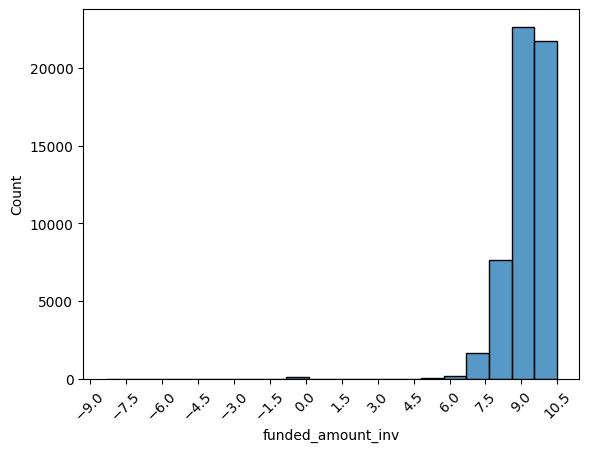

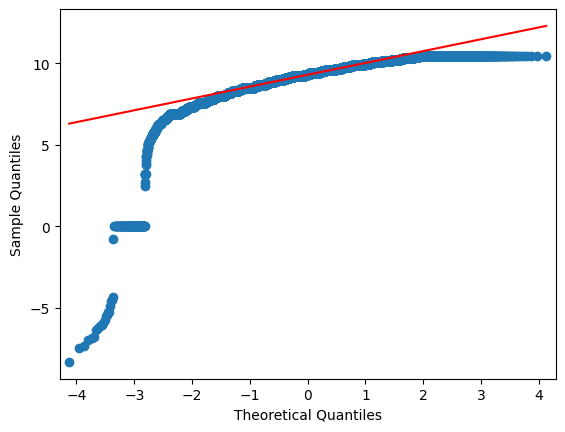

employment_min_years: K^2 test statistic = 11632.005, p = 0.000


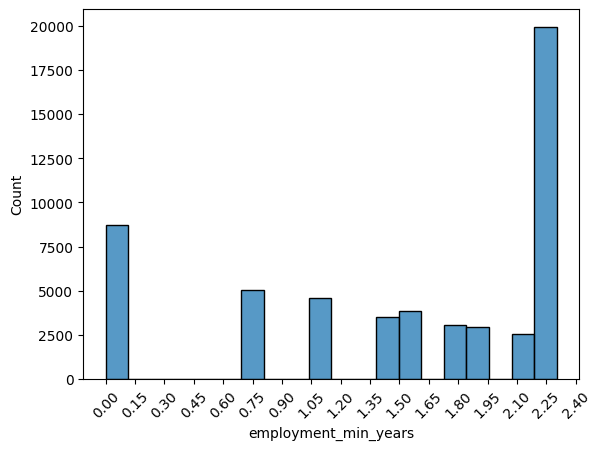

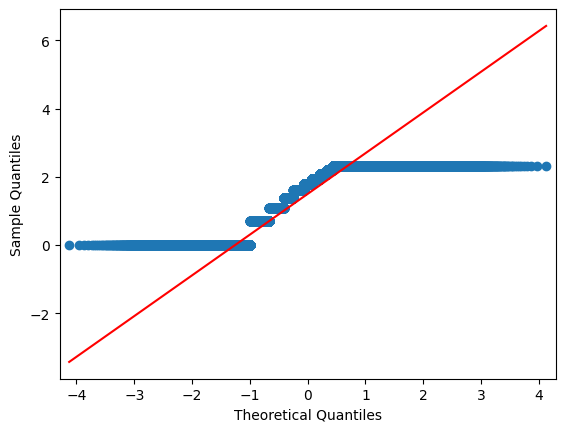

delinq_2yrs: K^2 test statistic = 56119.880, p = 0.000


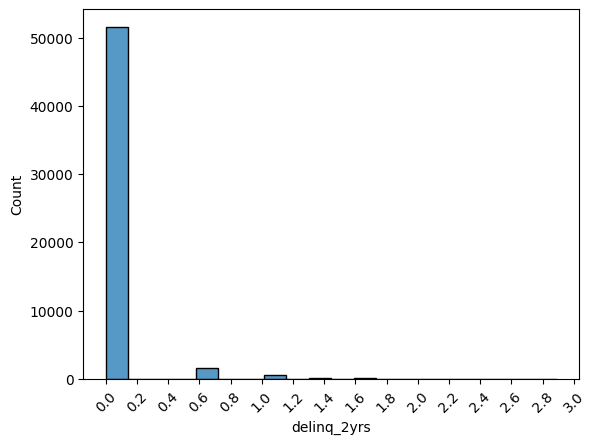

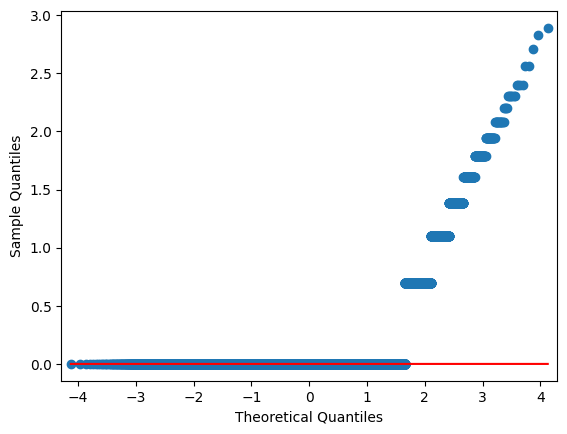

inq_last_6mths: K^2 test statistic = 19884.866, p = 0.000


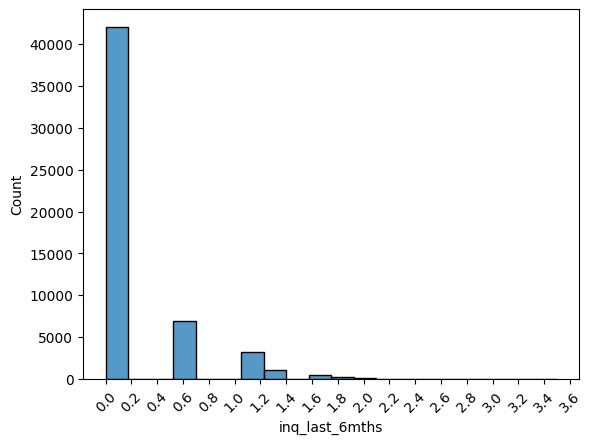

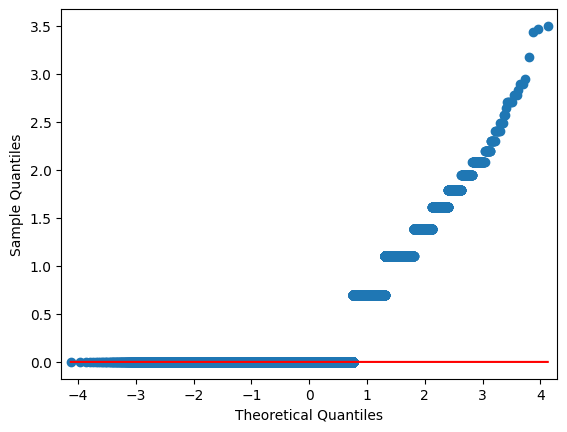

out_prncp: K^2 test statistic = 268219.825, p = 0.000


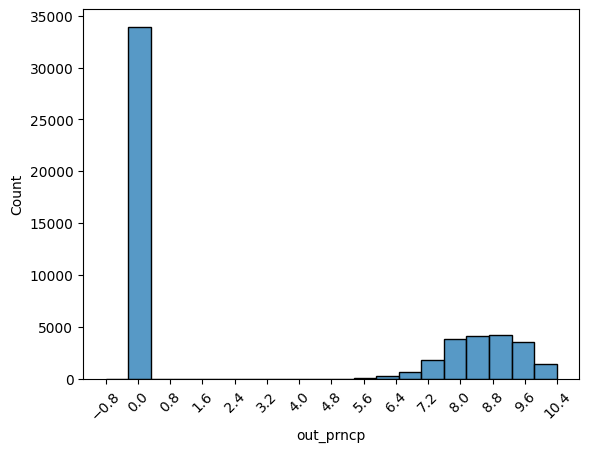

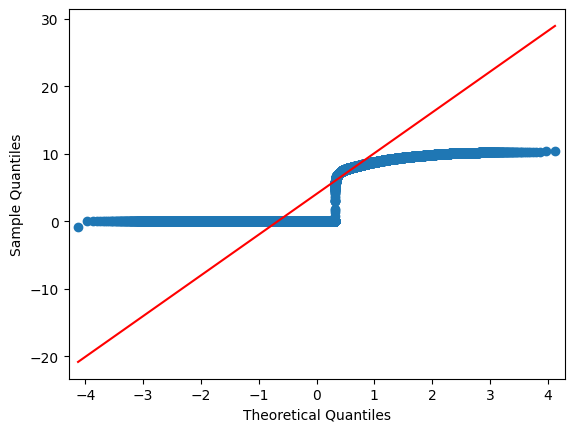

out_prncp_inv: K^2 test statistic = 268287.550, p = 0.000


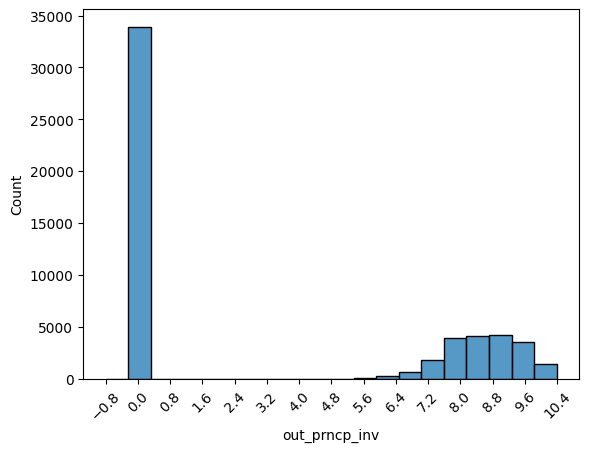

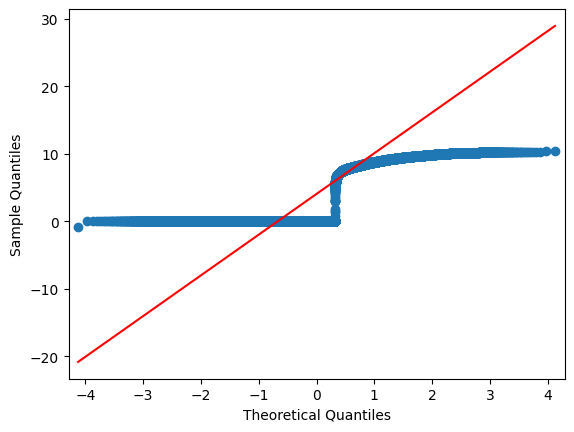

total_payment: K^2 test statistic = 16877.611, p = 0.000


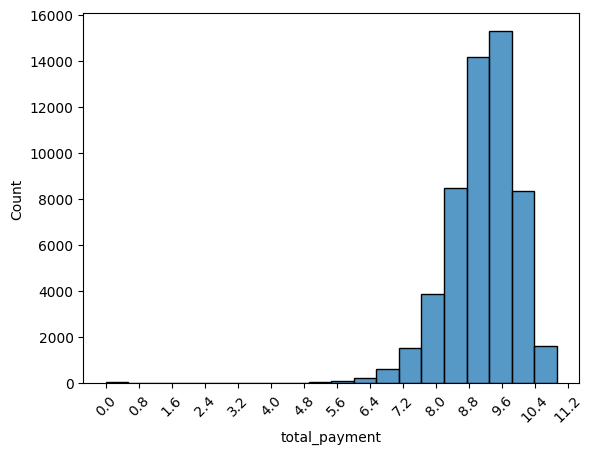

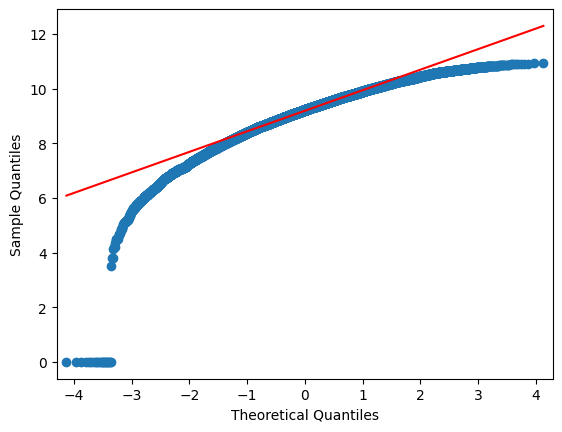

total_payment_inv: K^2 test statistic = 37483.352, p = 0.000


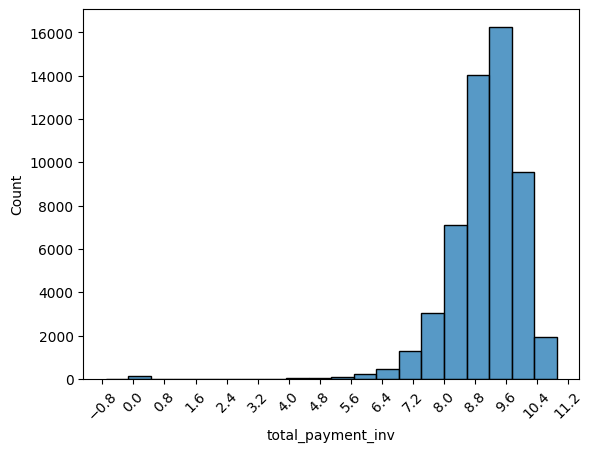

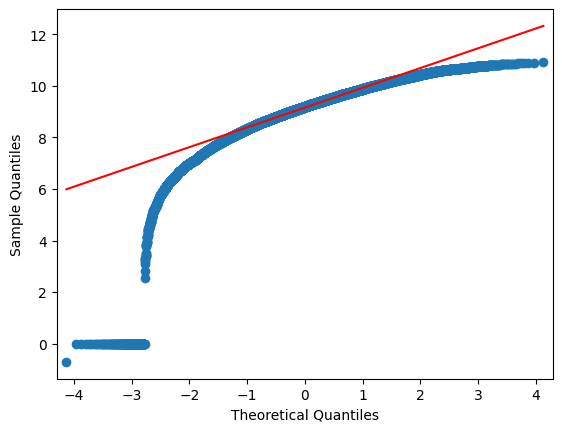

total_rec_prncp: K^2 test statistic = 25221.366, p = 0.000


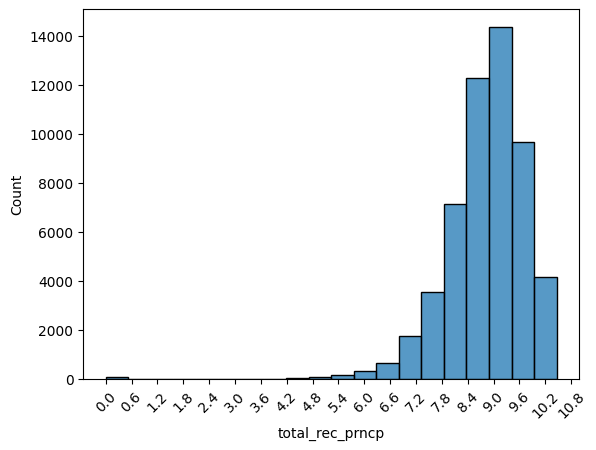

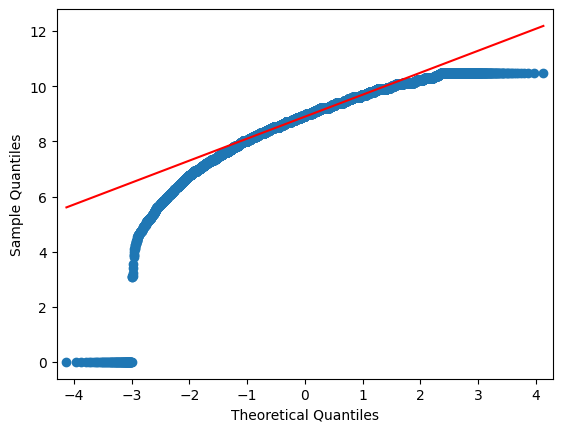

total_rec_int: K^2 test statistic = 10060.919, p = 0.000


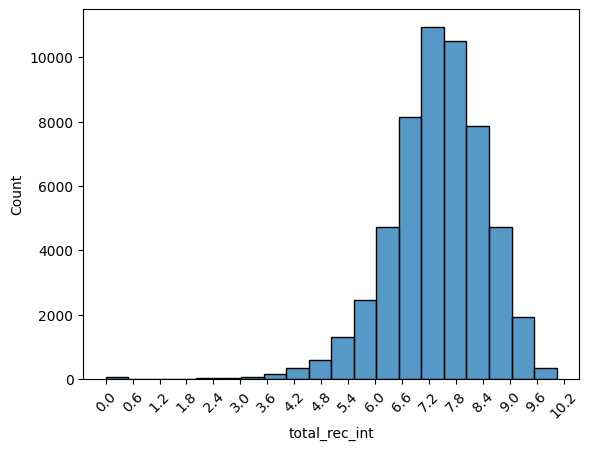

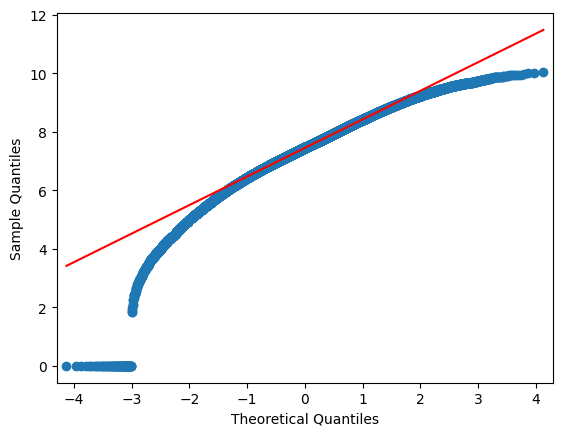

total_rec_late_fee: K^2 test statistic = 56340.387, p = 0.000


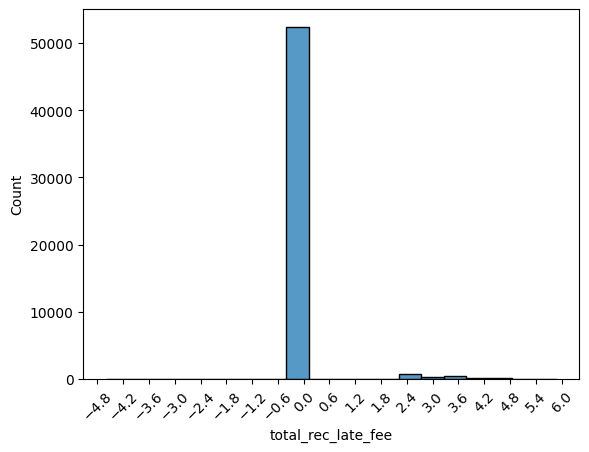

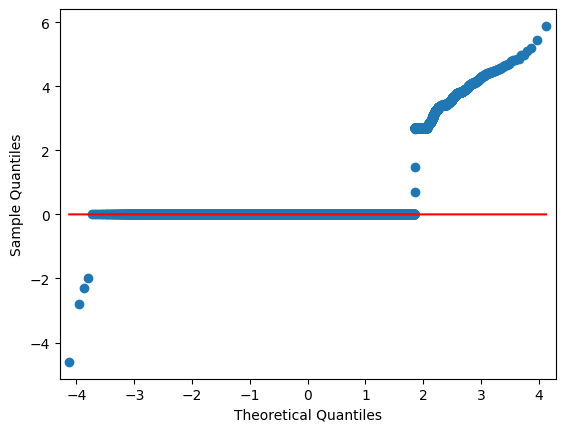

recoveries: K^2 test statistic = 41033.418, p = 0.000


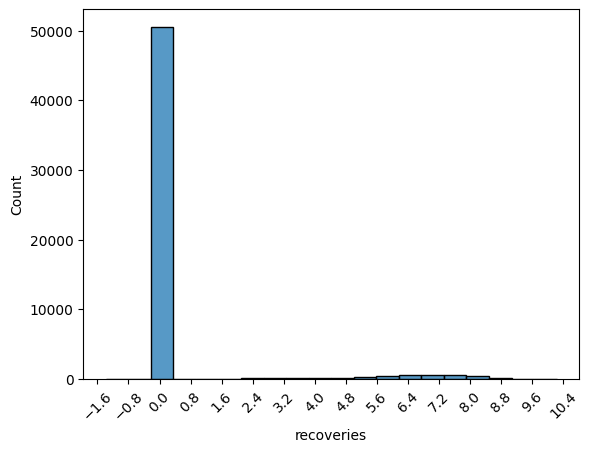

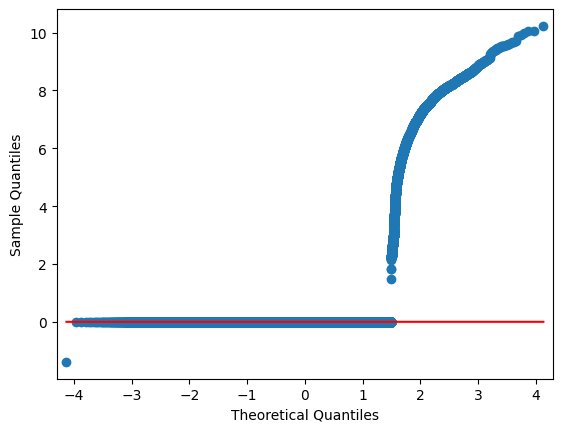

collection_recovery_fee: K^2 test statistic = 55616.907, p = 0.000


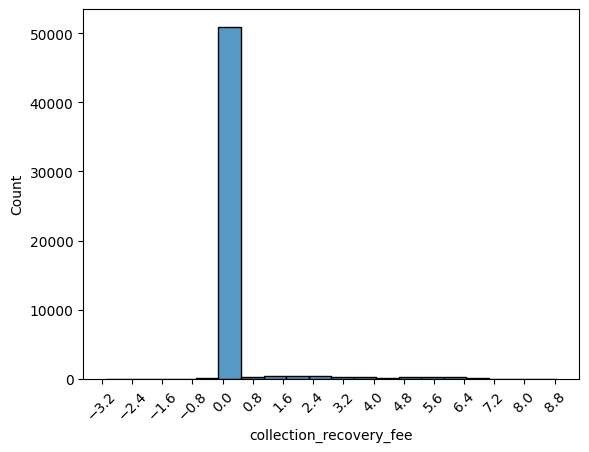

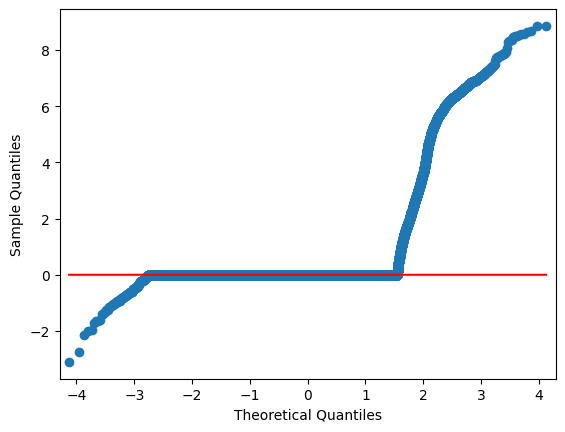

last_payment_amount: K^2 test statistic = 119.682, p = 0.000


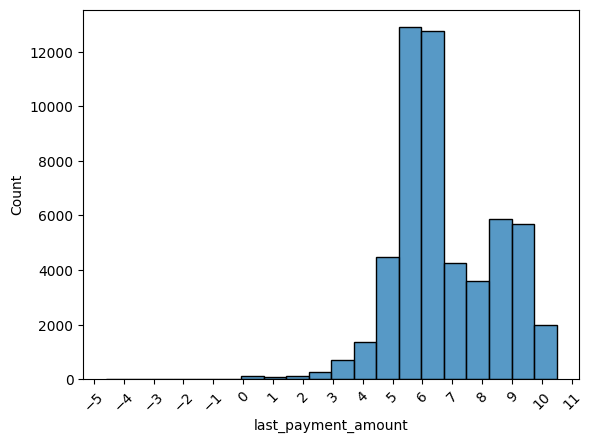

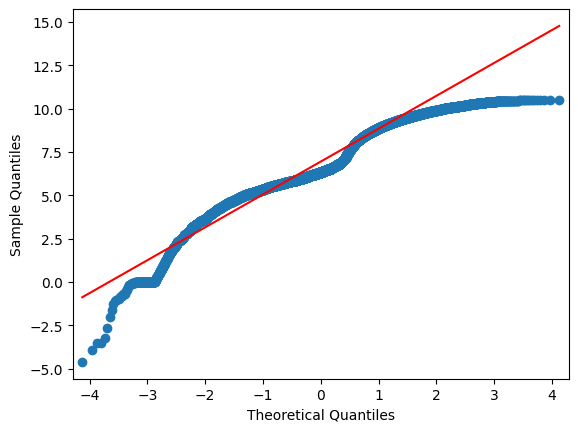

collections_12_mths_ex_med: K^2 test statistic = 186466.068, p = 0.000


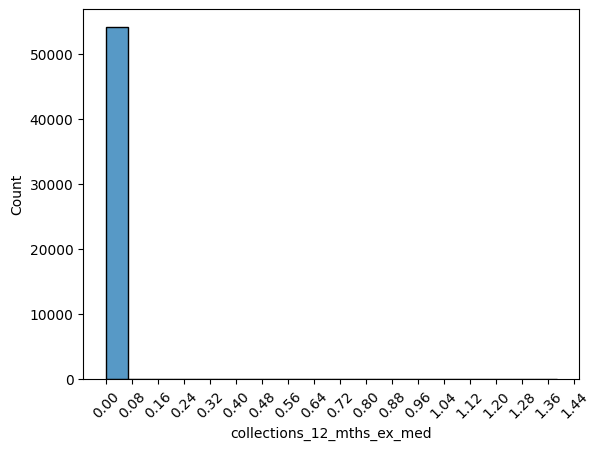

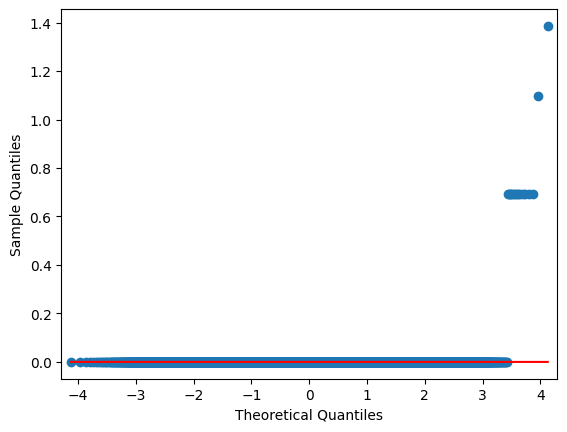

In [44]:
for col in cols_to_transform_zeros:
    skew_info_log_cols_2.skew_check(col, kde=False)

In [45]:

k2_dict_log_trans_2 = skew_info_log_cols_2.show_dict()

{'funded_amount_inv': 52071.33, 'employment_min_years': 11632.01, 'delinq_2yrs': 56119.88, 'inq_last_6mths': 19884.87, 'out_prncp': 268219.82, 'out_prncp_inv': 268287.55, 'total_payment': 16877.61, 'total_payment_inv': 37483.35, 'total_rec_prncp': 25221.37, 'total_rec_int': 10060.92, 'total_rec_late_fee': 56340.39, 'recoveries': 41033.42, 'collection_recovery_fee': 55616.91, 'last_payment_amount': 119.68, 'collections_12_mths_ex_med': 186466.07}


#### Update skew_df to compare k2 values.

In [46]:
k2_dict_log_trans.update(k2_dict_log_trans_2)

In [47]:
skew_df["log_data_k2_stat"] = k2_dict_log_trans

In [50]:
skew_df.head(6)

,skew,k2_stat,log_data_k2_stat
variable,,,
loan_amount,0.804599,4574.84,3663.57
funded_amount,0.819908,4731.28,3642.35
funded_amount_inv,0.814736,4688.20,52071.33
term_months,1.143660,10559.48,NaN
int_rate,0.455925,1720.48,NaN
instalment,0.996484,7274.98,3780.21


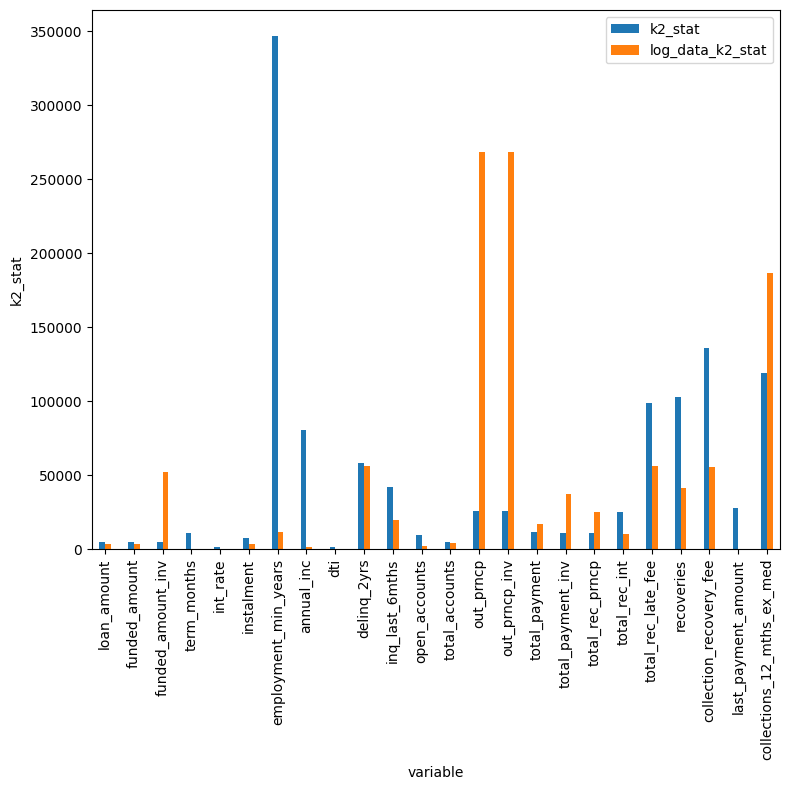

In [49]:
# Create a figure
fig, ax1 = plt.subplots(figsize=(8, 8))

skew_df[['k2_stat', 'log_data_k2_stat']].plot(kind='bar', ax=ax1, width=0.4)
ax1.set_ylabel('k2_stat')
ax1.tick_params(axis='y')
#ax1.set_ylim(bottom=-2.5)
#ax1.set_ylim(top=35)

fig.tight_layout()

### Box-Cox transform? (where you need to add constant)

In [ ]:
# Add a constant to values in columns with "zero" values.
#constant = 1
#loans_copy_a.loc[:, cols_to_transform_zeros] += constant

## Columns to transform
- **loan_amount, funded_amount and funded_amount_inv** all very similar, could fix positive skew. 
- **installment**: Positive skew. 
- **annual_inc**: Heavy positive skew.
- **delinq_2yrs and inq_last_6mths**: both have heavy positive skew. Not sure whether it makes sense to adjust... 
- **open_accounts** : Nice distribution but some potitive skew.
- **total_accounts**: Nice distribution but some positive skew. 